In [1]:
import pdftotext
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from pathlib import Path

***
***
## Process a directory of PDF

In [2]:
# adjust directory to point to location of files
directory = 'test_pdf/'

# create file list of pdf in directory
pdf_folder = Path(directory).rglob('*.pdf')

# create list of files and verify contents
# should be 5 if using supplied 'test_pdf' directory
files = [file for file in pdf_folder]
files

[PosixPath('test_pdf/MedvedevaEtAl2019.pdf'),
 PosixPath('test_pdf/KDD97-003.pdf'),
 PosixPath('test_pdf/P99-1001.pdf'),
 PosixPath('test_pdf/10.1007978-3-319-67056-018.pdf'),
 PosixPath('test_pdf/dummy_test.pdf')]

## Iterate through each file and
* Tokenize file text
* Create consistent case `.lower()` for each token
* Remove tokens from `nltk` library `english` stopwords
* Remove non-`.isalpha()` tokens

In [3]:
tokens = []
multi_corpus = []
stopWords = set(stopwords.words('english'))

# iterate every file in directory
for file in files:
    # open file
    with open(file, 'rb') as f:
        # conversion with pdftotext
        multi_pdf = pdftotext.PDF(f)
        multi_corpus.append(''.join(multi_pdf))
        # place current pdf text into list of tokens
        tokens += nltk.word_tokenize(''.join(multi_pdf))
        #corpus.append(tokens)

# update tokens by setting all to lowercase,
# removing stopwords,
# removing non-alphanumeric
tokens_removed = [word.lower() for word in tokens
                  if word.lower() not in stopWords
                  and word.isalpha()]

## verify removal of stopwords by displaying initial `token` lenght, `tokens_removed` length and difference of values

In [4]:
len(tokens), len(tokens_removed), len(tokens)-len(tokens_removed)

(45703, 20387, 25316)

***
***
## user directed word search
* alter `words` list to include desired search terms as list of type string

In [ ]:
# initialize user summary list
words = [""]
word_summary = []
# create list with sublist [word, count]
for word in range(len(words)):
    word_summary.append([words[word], nltk.Text(tokens).count(words[word])])

## user specifies 5 words
* utilizes `pandas` library to create dataframe of `word` and `count` as well as simple bar graph

In [ ]:
df_multi = pd.DataFrame(word_summary, columns = ["word", "count"])
df_multi

In [ ]:
df_multi.plot.bar(x='word', y='count')

***
***

## NLTK provides top 5
* This allows the data to drive further work by looking solely at the top N words in the files processed.
* By default the tokens are cleaned by removing `tokens` in the `nltk` library `stopwords` English list, as well as punctuation and non-alphanumeric `tokens` from the `string` methods.
* `nltk` directed search allows the opportunity for supervised follow-up utilizing inference from `tokens` provided and additional user input to narrow in on "hits" in the dataset.
* Since `most_common()` method provides all entries it can be indexed as a traditional list to look anywhere in the list if desired.
 * Alternately `most_common(n)` can be used where `n` is the number of words to search for if concerned about slowdown via processing too many tokens.

### create a frequencity distribution based off of the cleaned tokens

In [5]:
fd = nltk.FreqDist(tokens_removed)

### `most_common(n)` provides a list of `n` length with sublist `[word, count]`
### create a dataframe utilizing the 5 most common words in the cleaned token list

In [6]:
n = 10

In [7]:
data = fd.most_common()
df_fd = pd.DataFrame(data[:n], columns = ["word", "count"])
df_fd

,word,count
0,text,255
1,data,238
2,mining,195
3,information,153
4,cases,150
5,articles,124
6,learning,111
7,results,111
8,case,110
9,used,108


### create a simple bar graph of top `n` words vs count

<AxesSubplot:xlabel='word'>

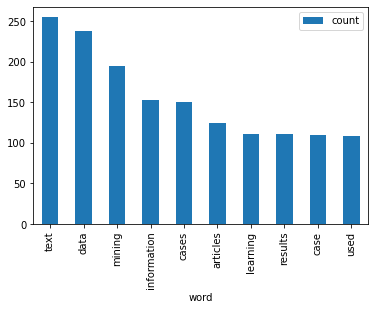

In [8]:
df_fd.plot.bar(x='word', y='count')

### Look at `tagged` and `entities` from the top N words

In [9]:
target_words = sorted(fd, key = fd.get, reverse = True)[:n]

## `pos_tag` codes: https://www.guru99.com/pos-tagging-chunking-nltk.html

In [10]:
tagged = nltk.pos_tag(target_words)
tagged

[('text', 'NN'),
 ('data', 'NNS'),
 ('mining', 'NN'),
 ('information', 'NN'),
 ('cases', 'NNS'),
 ('articles', 'VBZ'),
 ('learning', 'VBG'),
 ('results', 'NNS'),
 ('case', 'NN'),
 ('used', 'VBN')]

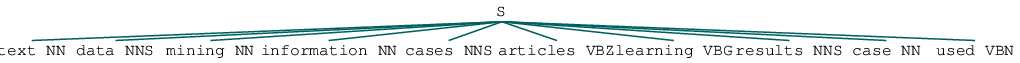

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [12]:
type(tagged), tagged, type(entities), entities

(list,
 [('text', 'NN'),
  ('data', 'NNS'),
  ('mining', 'NN'),
  ('information', 'NN'),
  ('cases', 'NNS'),
  ('articles', 'VBZ'),
  ('learning', 'VBG'),
  ('results', 'NNS'),
  ('case', 'NN'),
  ('used', 'VBN')],
 nltk.tree.Tree,
 Tree('S', [('text', 'NN'), ('data', 'NNS'), ('mining', 'NN'), ('information', 'NN'), ('cases', 'NNS'), ('articles', 'VBZ'), ('learning', 'VBG'), ('results', 'NNS'), ('case', 'NN'), ('used', 'VBN')]))

***
## TF-IDF tests
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
Adapt example code to:
* take unique tokens from each pdf being fed as input
* store each token as a string in the corpus

In [34]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(multi_corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
dfM = pd.DataFrame(denselist, columns=feature_names)

### set properties will allow us to remove every column that is not a targeted word from the early NLTK selection


In [35]:
dropped_columns = list(set(feature_names).difference(target_words))
dfM.drop(columns = dropped_columns)

,articles,case,cases,data,information,learning,mining,results,text,used
0,0.023118,0.082652,0.142561,0.047975,0.024673,0.036324,0.002431,0.029470,0.017827,0.035639
1,0.000000,0.007946,0.002361,0.055444,0.008401,0.001680,0.045688,0.016801,0.019864,0.018481
2,0.034813,0.005325,0.000000,0.103584,0.103584,0.002252,0.098508,0.011259,0.157080,0.011259
3,0.143512,0.005426,0.001612,0.092931,0.076869,0.061954,0.184481,0.030977,0.238740,0.033272
4,0.000000,0.000000,0.000000,0.027596,0.003942,0.017740,0.000000,0.051250,0.000000,0.023654


### create dictionary of k:v pair index : pdf filename to rename pandas rows for readability

In [36]:
names = {}
for x in range(len(files)):
    print(str(x)+' '+str(files[x])[9:])
    names[x] = str(files[x])[9:]

0 MedvedevaEtAl2019.pdf
1 KDD97-003.pdf
2 P99-1001.pdf
3 10.1007978-3-319-67056-018.pdf
4 dummy_test.pdf


In [37]:
dfM.rename(index=names, inplace = True)
dfM

,00,000,003,01,012,02,0250,03,05,050,...,ﬁles,ﬁll,ﬁltered,ﬁltering,ﬁnancial,ﬁnd,ﬁnding,ﬁndings,ﬁnds,ﬁrst
MedvedevaEtAl2019.pdf,0.000000,0.000000,0.002877,0.001160,0.001438,0.000000,0.000000,0.000000,0.000000,0.001438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KDD97-003.pdf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P99-1001.pdf,0.000000,0.011438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10.1007978-3-319-67056-018.pdf,0.000000,0.001943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004815,0.002408,0.004815,0.004815,0.002408,0.012039,0.014446,0.007223,0.002408,0.007223
dummy_test.pdf,0.004137,0.000000,0.000000,0.010012,0.000000,0.004137,0.004137,0.004137,0.004137,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
dfM.drop(columns = dropped_columns)

,articles,case,cases,data,information,learning,mining,results,text,used
MedvedevaEtAl2019.pdf,0.023118,0.082652,0.142561,0.047975,0.024673,0.036324,0.002431,0.029470,0.017827,0.035639
KDD97-003.pdf,0.000000,0.007946,0.002361,0.055444,0.008401,0.001680,0.045688,0.016801,0.019864,0.018481
P99-1001.pdf,0.034813,0.005325,0.000000,0.103584,0.103584,0.002252,0.098508,0.011259,0.157080,0.011259
10.1007978-3-319-67056-018.pdf,0.143512,0.005426,0.001612,0.092931,0.076869,0.061954,0.184481,0.030977,0.238740,0.033272
dummy_test.pdf,0.000000,0.000000,0.000000,0.027596,0.003942,0.017740,0.000000,0.051250,0.000000,0.023654


In [49]:
dfSummary = pd.DataFrame({'word': [], 'max TF-IDF value' : [], 'file' : []})

In [52]:
for word in target_words:
    dfSummary = dfSummary.append({'word': word, 'max TF-IDF value' : dfM[word].max(), 'file' : dfM[word].idxmax()}, ignore_index = True)

In [57]:
dfSummary.sort_values(by = 'max TF-IDF value', ascending = False)

,word,max TF-IDF value,file
0,text,0.238740,10.1007978-3-319-67056-018.pdf
2,mining,0.184481,10.1007978-3-319-67056-018.pdf
5,articles,0.143512,10.1007978-3-319-67056-018.pdf
4,cases,0.142561,MedvedevaEtAl2019.pdf
1,data,0.103584,P99-1001.pdf
3,information,0.103584,P99-1001.pdf
8,case,0.082652,MedvedevaEtAl2019.pdf
6,learning,0.061954,10.1007978-3-319-67056-018.pdf
7,results,0.051250,dummy_test.pdf
9,used,0.035639,MedvedevaEtAl2019.pdf


***
***
# TO-DO
### immediate
* clustering method

### long-term
* Look into API for digital commons
* Adjust visualizations
***
***

## KMeans

In [58]:
from sklearn.cluster import KMeans

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
* https://iq.opengenus.org/implement-document-clustering-python/

In [72]:
num = len(multi_pdf) # set clusters to number of documents being scrubbed?
kmeans = KMeans(n_clusters = num, init = 'k-means++', max_iter = 500, n_init = 1)
kmeans.fit(vectors)
centroids = kmeans.cluster_centers_
print(centroids) #This will print cluster centroids as tf-idf vectors

[[0.         0.01143798 0.         ... 0.         0.         0.        ]
 [0.00413669 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.0028766  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00194255 0.         ... 0.00722322 0.00240774 0.00722322]]


In [71]:
kmeans.predict(vectors)

array([2, 3, 0, 4, 1], dtype=int32)